@oanavesa 03/27/2020

Homework 3 for ASTR621: coding the Chiang-Goldreich 97 model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


In [2]:
# constants

M_sun = 1 # solar masses
R_sun = 69600000000  # radius of sun [cm]
T_star = 4000 # temperature of star [K]
M_star = M_sun/2
R_star = 2.5*R_sun
kb = 1.3806e-16 #Boltzmann's Constant [erg/K]
c = 2.99e10  # speed of light [cm/s]
h = 6.626e-27  #Planck's Constent [erg*s]
a_i = 0.07*1.496e+13 # initial [cm]
a_f = 270*1.496e+13 # final [cm]
sb = 5.6705e-5 # Stefan-Boltzmann constant [erg cm-2 K-4 s-1]


In [3]:
# frequency array
freq = np.linspace(10**10,10**15,10000) # x-axis [Hz]
# limits arrray for integration
limits = np.linspace(a_i,a_f,1000)

# Problem 1

In [4]:
def disk_Planck_Function(v,Teff):
    '''This function computes the disk blackbody spectrum in frequency scapce.
    
    Input:
    v = frequency array
    Teff = effective temperature of the disk
    
    Output:
    The disk blackbody spectrum
    '''
    
    term1 = (2.*h*v**3.)/(c**2.)
    exo = (h*v)/(kb*Teff)
    term2 = (np.exp(exo) - 1.)
    return 8*(np.pi**2.)*v*term1* (1./term2)

def Stellar_Luminosity(v,R,T):
    '''This function computes the stellar blackbody spectrum in frequency space.
    
    Input:
    v = frequency array
    T =  temperature of the star
    R = radius of the star
    
    Output:
    The stellar blackbody spectrum
    '''
    
    term1 = (2.*h*(v**3.))/(c**2.)
    term2 = (np.exp((h*v)/(kb*T)) - 1.)
    return 4.*np.pi*(R**2.)*v*term1*(1/term2)

def stellar_luminosity_norm(R,T):
    ''' This function computes the stellar luminosity with which the disk blackbody
    spectrum and the stellar blackbody spectrum need to be normalized by
    
    Input:
    R = radius of star
    T = temperature of star
    
    Output:
    the stellar luminosity
  '''
    
    return 4*np.pi*(R**2)*sb*(T**4)

def flat_disk_effective_temp(R,a,T):
    ''' This is the effective temperature of a flat disk geometry.
    
    Input:
    R = radius of star
    T = temperature of star
    a = distance to integrate over
    
    Output:
    the flat disk effective temperature
    '''
    
    term1 = (2/(3*np.pi))**(1/4)
    term2 = (R/a)**(3/4)
    return term1*term2*T

def disk_terms(v):
    ''' This function holds the main integration.
    
    Input:
    v = frequency array
    
    Output:
    the integrated values
    '''
    
    diskterm = [j*disk_Planck_Function(v,flat_disk_effective_temp(R_star,j,T_star)) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd

In [5]:
stellar_norm = stellar_luminosity_norm(R_star,T_star)
stellar_blackbody = Stellar_Luminosity(freq,R_star,T_star)

In [6]:
# this cell finishes the integration
new_flat_disk = []

for r in freq:
    sf = disk_terms(r)
    new_flat_disk.append(sf)
    
flat_disk = np.asarray(new_flat_disk)

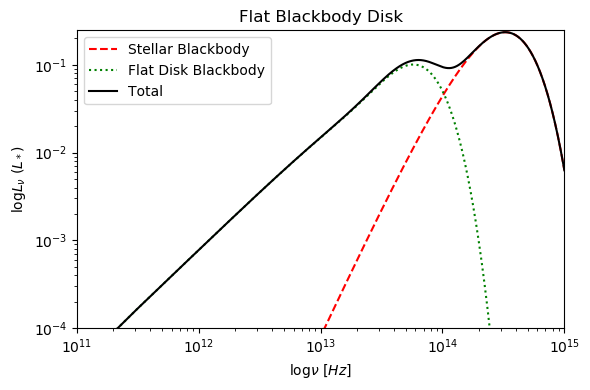

In [7]:
plt.figure(dpi=100)
plt.plot(freq,(stellar_blackbody/stellar_norm), color='red',linestyle='--',label='Stellar Blackbody')
plt.plot(freq,flat_disk/stellar_norm, color='green',linestyle=':',label='Flat Disk Blackbody')
plt.plot(freq,flat_disk/stellar_norm + stellar_blackbody/stellar_norm, color='black',linestyle='-',label='Total')

plt.title('Flat Blackbody Disk')
plt.xlabel(r'$\log \nu \ [Hz]$')
plt.ylabel(r'$\log L_{\nu} \ (L_*)$')

plt.ylim(10**-4)
plt.xlim(10**11,10**15)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Flat_BlackBody.png')
plt.show()

-------------


# Problem 2

In [8]:
def flared_disk_temp(R,a,T):
    '''This function computes the flared disk geometry effective temperature.
    
    Input:
    R = radius of star
    T = temperature of star
    a = distance over which to integrate
    
    Output:
    the flared disk geometry effective temperature
    '''
    
    alpha = (0.4*R/a) + (9/175)*a**(2/7)
    T_eff = (alpha/2)**(1/4)*(R/a)**(1/2)*T
    return T_eff

def flared_disk_terms(v):
    ''' This function holds the main integration.
    
    Input:
    v = frequency array
    
    Output:
    the integrated values
    '''
    diskterm = [j*disk_Planck_Function(v,flared_disk_temp(R_star,j,T_star)) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd

In [9]:
# this cell finishes the integration

flarednewdisk = []
for r in freq:
    sf = flared_disk_terms(r)
    
    flarednewdisk.append(sf)

flared_disk = np.asarray(flarednewdisk)

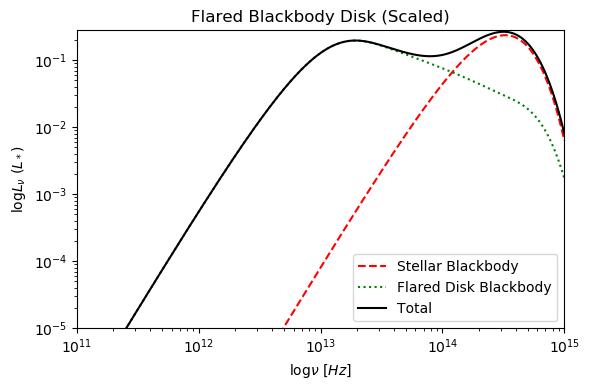

In [10]:
plt.figure(dpi=100)
plt.plot(freq,stellar_blackbody/stellar_norm, color='red',linestyle='--',label='Stellar Blackbody')

plt.plot(freq,(flared_disk/stellar_norm)/10000, color='green',linestyle=':',label='Flared Disk Blackbody')
plt.plot(freq,(flared_disk/stellar_norm)/10000 + stellar_blackbody/stellar_norm, color='black',linestyle='-',label='Total')

plt.title('Flared Blackbody Disk (Scaled)')
plt.xlabel(r'$\log \nu \ [Hz]$')
plt.ylabel(r'$\log L_{\nu} \ (L_*)$')

plt.ylim(10**-5)
plt.xlim(10**11,10**15)


plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

If I scale the flared blackbody by a factor of 10000, it looks similar to the figure. If I don't it looks like this:

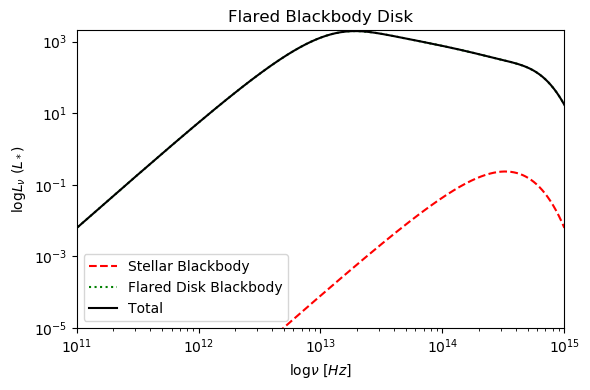

In [11]:
plt.figure(dpi=100)
plt.plot(freq,stellar_blackbody/stellar_norm, color='red',linestyle='--',label='Stellar Blackbody')

plt.plot(freq,(flared_disk/stellar_norm), color='green',linestyle=':',label='Flared Disk Blackbody')
plt.plot(freq,(flared_disk/stellar_norm) + stellar_blackbody/stellar_norm, color='black',linestyle='-',label='Total')

plt.title('Flared Blackbody Disk')
plt.xlabel(r'$\log \nu \ [Hz]$')
plt.ylabel(r'$\log L_{\nu} \ (L_*)$')

plt.ylim(10**-5)
plt.xlim(10**11,10**15)


plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

----------------

# Problem 3

## Problem 3a: See attached PDF

## Problem 3b

In [12]:
# changing constants back to AU
a_i_AU= 0.07 # initial [AU]
a_f_AU = 270 # final [AU]

# limits for integration
limits_AU = np.linspace(a_i_AU,a_f_AU,10000)
R_star_AU = 0.07/6 # radius of star [AU]
column_dens0 = (10**3) # initial column density [g/cm^2]
k_v = 400 # dust opacity [cm^2/g]

In [13]:
def T_ds(a):
    ''' This function computes the temperature of the dust particles
    
    Input:
    a = distance over which to integrate [AU]
    
    Output:
    dust particles temperature
    '''
    
    return 550/(a**(2/5))

def flared_interior_effective_temp_interior1(R,T,a):
    ''' This function computes the effective interior temperature (Eqn 12a) of a flared 
    disk blackbody geometry.
    
    Input:
    R = radius of star
    T = temperature of star
    a = distance over which to integrate
    
    Output:
    effective interior temperature of a flared disk
    '''
    
    alpha = (0.4*R/a) + (9/175)*a**(2/7)
    T1 = (alpha/4)**(1/4)*(R/a)**(1/2)*T
    return T1

def flared_interior_effective_temp2(R,T,a,Tdust,beta):
    ''' This function computes the effective interior temperature (Eqn 12b) of a flared 
    disk blackbody geometry.
    
    Input:
    R = radius of star
    T = temperature of star
    a = distance over which to integrate
    
    Output:
    effective interior temperature of a flared disk
    '''
    
    alpha = (0.4*R/a) + (9/175)*a**(2/7)
    column_dens = a**(-3/2)*column_dens0
    eps_i = (Tdust/T)**beta
    T2 = (alpha/(4*eps_i*k_v*column_dens))**(1/4)*(R/a)**(1/2)*T
    return T2
    
def flared_interior_effective_temp3(R,a,T,Tdust,beta):
    ''' This function computes the effective interior temperature (Eqn 12c) of a flared 
    disk blackbody geometry.
    
    Input:
    R = radius of star
    T = temperature of star
    a = distance over which to integrate
    Tdust = dust particle temperature
    beta = some term
    
    Output:
    effective interior temperature of a flared disk
    '''
    
    alpha = (0.4*R/a) + (9/175)*a**(2/7)
    eps_i = (Tdust/T)**beta
    eps_s = (Tdust/T)**beta
    T3 = ((alpha*eps_s**2)/eps_i)**(1/4)*Tdust
    return T3

def flat_interior_effective_temp1(R,T,a):
    ''' This function computes the effective interior temperature (Eqn 12a) of a flat 
    disk blackbody geometry.
    
    Input:
    R = radius of star
    T = temperature of star
    a = distance over which to integrate
    
    Output:
    effective interior temperature of a flat disk
    '''
    
    alpha = (0.4*R)/a
    T1 = (alpha/4)**(1/4)*(R/a)**(1/2)*T
    return T1

def flat_interior_effective_temp2(R,T,a,Tdust,beta):
    ''' This function computes the effective interior temperature (Eqn 12b) of a flat 
    disk blackbody geometry.
    
    Input:
    R = radius of star
    T = temperature of star
    a = distance over which to integrate
    
    Output:
    effective interior temperature of a flat disk
    '''
    
    alpha = (0.4*R)/a
    column_dens = a**(-3/2)*column_dens0
    eps_i = (Tdust/T)**beta
    T2 = (alpha/(4*eps_i*k_v*column_dens))**(1/4)*(R/a)**(1/2)*T
    return T2

def flat_interior_effective_temp3(R,a,T,Tdust,beta):
    ''' This function computes the effective interior temperature (Eqn 12c) of a flat 
    disk blackbody geometry.
    
    Input:
    R = radius of star
    T = temperature of star
    a = distance over which to integrate
    Tdust = dust particle temperature
    beta = some term
    
    Output:
    effective interior temperature of a flat disk
    '''
    
    alpha = (0.4*R)/a
    eps_i = (Tdust/T)**beta
    eps_s = (Tdust/T)**beta
    T3 = ((alpha*eps_s**2)/(eps_i))**(1/4)*Tdust
    return T3



In [14]:
# dust particle temperature
tdust = T_ds(limits_AU)

# interior temperatures for a flared disk
t1_flared = flared_interior_effective_temp_interior1(R_star_AU,T_star,limits_AU)
t2_flared = flared_interior_effective_temp2(R_star_AU,T_star,limits_AU,tdust,1)
t3_flared = flared_interior_effective_temp3(R_star_AU,limits_AU,T_star,tdust,1)

# interior temperatures for a flat disk
t1_flat = flat_interior_effective_temp1(R_star_AU,T_star,limits_AU)
t2_flat = flat_interior_effective_temp2(R_star_AU,T_star,limits_AU,tdust,1)
t3_flat = flat_interior_effective_temp3(R_star_AU,limits_AU,T_star,tdust,1)

# total interior temperatures
t_flared_total = t1_flared+t2_flared+t3_flared
t_flat_total = t1_flat +t2_flat +t3_flat

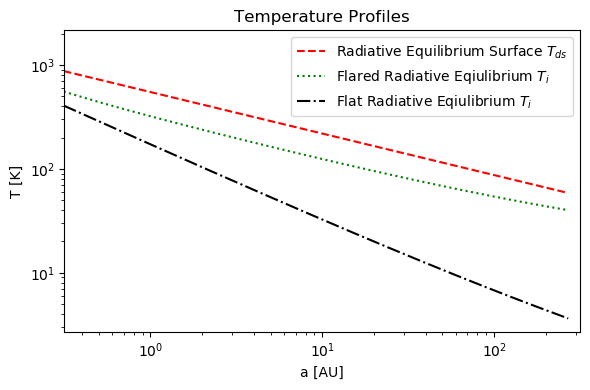

In [15]:
plt.figure(dpi=100)
plt.plot(limits_AU,tdust, color='red',linestyle='--',label=r'Radiative Equilibrium Surface $T_{ds}$')
plt.plot(limits_AU,t_flared_total, color='green',linestyle=':',label=r'Flared Radiative Eqiulibrium $T_i$')
plt.plot(limits_AU,t_flat_total, color='black',linestyle='-.',label=r'Flat Radiative Eqiulibrium $T_i$')

plt.title('Temperature Profiles')
plt.ylabel('T [K]')
plt.xlabel('a [AU]')

plt.xscale('log')
plt.yscale('log')

plt.xlim(10**-.5,10**2.5)

plt.legend(loc='best')
plt.tight_layout()
plt.show()

--------

# Problem 4

In [16]:
def tau_v(a):
    '''This function computes the optical depth as a function of distance
    
    Input:
    a = distance over which to integrate
    
    Output:
    optical depth as a function of distance in AU
    '''
    
    return (4e5)*(1/a)**(3/2)

def optically_thin_flat_disk_terms(v):
    ''' This functions holds the main integration for a flat disk geometry in
    the optically thin regime (surface).
    '''
    
    diskterm = [disk_Planck_Function(v,flat_disk_effective_temp(R_star,j,T_star))*tau_v(j) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd

def optically_thick_flat_disk_terms(v):
    ''' This functions holds the main integration for a flat disk geometry in
    the optically thick regime (surface).
    '''
    
    diskterm = [j*disk_Planck_Function(v,flat_disk_effective_temp(R_star,j,T_star)) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd

def optically_thin_flat_disk_terms_interior(v,temp):
    ''' This functions holds the main integration for a flat disk geometry in
    the optically thin regime (interior).
    '''
    
    diskterm = [disk_Planck_Function(v,temp)*tau_v(j) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd

def optically_thick_flat_disk_terms_interior(v,temp):
    ''' This functions holds the main integration for a flat disk geometry in
    the optically thick regime (interior).
    '''
    
    diskterm = [j*disk_Planck_Function(v,temp) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd

def optically_thin_flared_disk_terms(v):
    ''' This functions holds the main integration for a flared disk geometry in
    the optically thin regime (surface).
    '''
    
    diskterm = [disk_Planck_Function(v,flared_disk_temp(R_star,j,T_star))*tau_v(j) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd

def optically_thick_flared_disk_terms(v):
    ''' This functions holds the main integration for a flared disk geometry in
    the optically thick regime (surface).
    '''
    
    diskterm = [j*disk_Planck_Function(v,flared_disk_temp(R_star,j,T_star)) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd

def optically_thin_flared_disk_terms_interior(v,temp):
    ''' This functions holds the main integration for a flared disk geometry in
    the optically thin regime (interior).
    '''
    
    diskterm = [disk_Planck_Function(v,temp)*tau_v(j) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd

def optically_thick_flared_disk_terms_interior(v,temp):
    ''' This functions holds the main integration for a flared disk geometry in
    the optically thick regime (interior).
    '''
    
    diskterm = [j*disk_Planck_Function(v,temp) for j in limits]
    
    intd = np.trapz(diskterm,limits)
    
    return intd



In [17]:
flat_op_thin_disk = []
flat_op_thick_disk = []

for r in freq:
    sf = optically_thin_flat_disk_terms(r)
    sf2 = optically_thick_flat_disk_terms(r)
    
    flat_op_thin_disk.append(sf)
    flat_op_thick_disk.append(sf2)

opt_thin_flat_disk = np.asarray(flat_op_thin_disk)
opt_thick_flat_disk = np.asarray(flat_op_thick_disk)

In [18]:
flat_op_thin_disk_int = []
flat_op_thick_disk_int = []

for r,t in zip(freq,t_flat_total):
    sf = optically_thin_flat_disk_terms_interior(r,t)
    sf2 = optically_thick_flat_disk_terms_interior(r,t)
    
    flat_op_thin_disk_int.append(sf)
    flat_op_thick_disk_int.append(sf2)

opt_thin_flat_disk_interior = np.asarray(flat_op_thin_disk_int)
op_thick_flat_disk_interior = np.asarray(flat_op_thick_disk_int)

In [19]:
flared_op_thin_disk = []
flared_op_thick_disk = []

for r in freq:
    sf = optically_thin_flared_disk_terms(r)
    sf2 = optically_thick_flared_disk_terms(r)
    
    flared_op_thin_disk.append(sf)
    flared_op_thick_disk.append(sf2)

flared_opt_thin_disk = np.asarray(flared_op_thin_disk)
flared_opt_thick_disk = np.asarray(flared_op_thick_disk)

In [20]:
flared_op_thin_disk_int = []
flared_op_thick_disk_int = []

for r,t in zip(freq,t_flared_total):
    sf = optically_thin_flared_disk_terms_interior(r,t)
    sf2 = optically_thick_flared_disk_terms_interior(r,t)
    
    flared_op_thin_disk_int.append(sf)
    flared_op_thick_disk_int.append(sf2)

flared_opt_thin_disk_interior = np.asarray(flared_op_thin_disk_int)
flared_opt_thick_disk_interior = np.asarray(flared_op_thick_disk_int)

In [21]:
# totaling the terms to make code cleaner...

surface_flat_disk = (opt_thin_flat_disk + opt_thick_flat_disk)/stellar_norm
interior_flat_disk = (opt_thin_flat_disk_interior + op_thick_flat_disk_interior)/stellar_norm

surface_flared_disk = (flared_opt_thin_disk + flared_opt_thick_disk)/stellar_norm
interior_flared_disk = (flared_opt_thin_disk_interior + flared_opt_thick_disk_interior)/stellar_norm

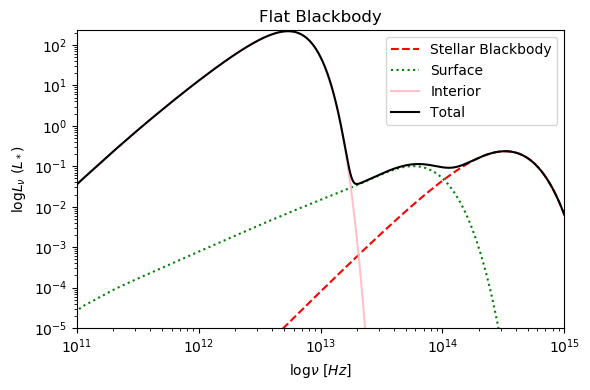

In [22]:
plt.figure(dpi=100)
plt.plot(freq,(stellar_blackbody)/stellar_norm, color='red',linestyle='--',label='Stellar Blackbody')


plt.plot(freq,surface_flat_disk, color='green',linestyle=':',label='Surface')
plt.plot(freq,interior_flat_disk , color='pink',linestyle='-',label='Interior')

plt.plot(freq,(surface_flat_disk + interior_flat_disk + (stellar_blackbody)/stellar_norm) , color='black',linestyle='-',label='Total')


plt.title('Flat Blackbody')
plt.xlabel(r'$\log \nu \ [Hz]$')
plt.ylabel(r'$\log L_{\nu} \ (L_*)$')

plt.ylim(10**-5)
plt.xlim(10**11,10**15)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Flat_BlackBody.png')
plt.show()

If I divide the interior blackbody by 10,000, I get this:

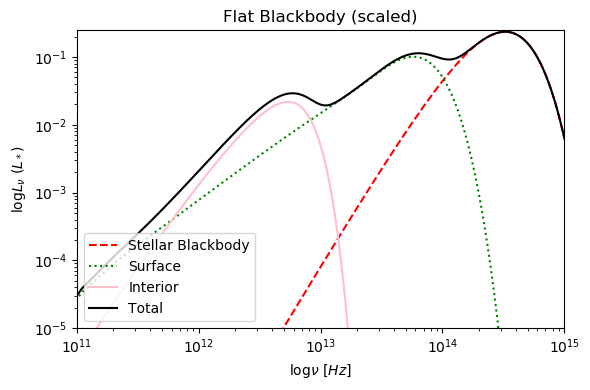

In [23]:
plt.figure(dpi=100)
plt.plot(freq,(stellar_blackbody)/stellar_norm, color='red',linestyle='--',label='Stellar Blackbody')


plt.plot(freq,surface_flat_disk, color='green',linestyle=':',label='Surface')
plt.plot(freq,interior_flat_disk/10000 , color='pink',linestyle='-',label='Interior')

plt.plot(freq,(surface_flat_disk + interior_flat_disk/10000 + (stellar_blackbody)/stellar_norm) , color='black',linestyle='-',label='Total')


plt.title('Flat Blackbody (scaled)')
plt.xlabel(r'$\log \nu \ [Hz]$')
plt.ylabel(r'$\log L_{\nu} \ (L_*)$')

plt.ylim(10**-5)
plt.xlim(10**11,10**15)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Flat_BlackBody.png')
plt.show()

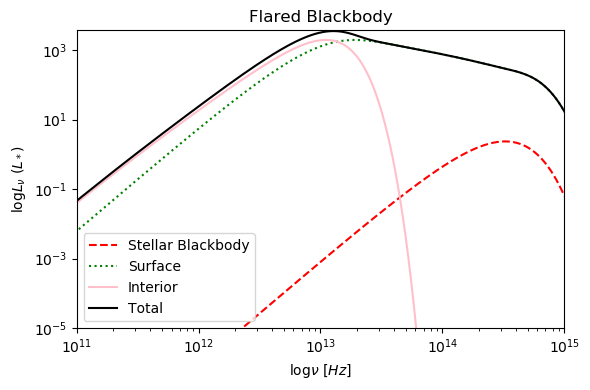

In [24]:
plt.figure(dpi=100)
plt.plot(freq,(stellar_blackbody)/stellar_norm*10, color='red',linestyle='--',label='Stellar Blackbody')



plt.plot(freq,surface_flared_disk, color='green',linestyle=':',label='Surface')
plt.plot(freq,interior_flared_disk, color = 'pink', linestyle='-',label='Interior')
plt.plot(freq, surface_flared_disk + interior_flared_disk + (stellar_blackbody)/stellar_norm , color='black',linestyle='-',label='Total')


plt.title('Flared Blackbody')
plt.xlabel(r'$\log \nu \ [Hz]$')
plt.ylabel(r'$\log L_{\nu} \ (L_*)$')

plt.ylim(10**-5)
plt.xlim(10**11,10**15)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Flat_BlackBody.png')
plt.show()

If I multiply the stellar blackbody by 10 and divide the surface and interior blackbody's by 1,000, I get this:

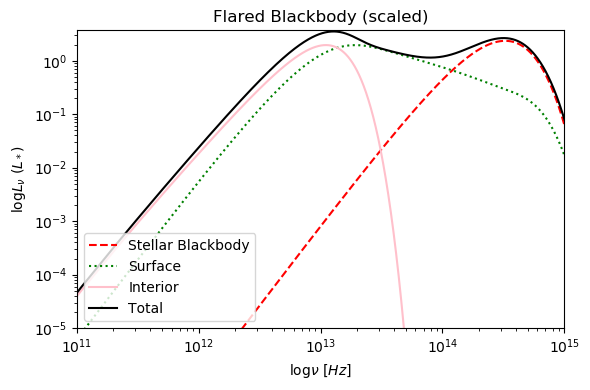

In [25]:
plt.figure(dpi=100)
plt.plot(freq,(stellar_blackbody)/stellar_norm*10, color='red',linestyle='--',label='Stellar Blackbody')



plt.plot(freq,surface_flared_disk/1000, color='green',linestyle=':',label='Surface')
plt.plot(freq,interior_flared_disk/1000, color = 'pink', linestyle='-',label='Interior')
plt.plot(freq, surface_flared_disk/1000 + interior_flared_disk/1000 + (stellar_blackbody)/stellar_norm*10 , color='black',linestyle='-',label='Total')


plt.title('Flared Blackbody (scaled)')
plt.xlabel(r'$\log \nu \ [Hz]$')
plt.ylabel(r'$\log L_{\nu} \ (L_*)$')

plt.ylim(10**-5)
plt.xlim(10**11,10**15)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Flat_BlackBody.png')
plt.show()

------------

# Problem 5

In [26]:
logLv= 10**np.array([30.1,30.05,30.75,31.2,32.4,32.55,32.4,32.2,32.5,32.75,33.2,33.3,33.25,33.1,32.75,32.4])
logv = 10**np.array([11.375,11.425,11.6,11.65,12.45,12.7,13.1,13.4,13.925,14.1,14.225,14.575,14.675,14.7,14.825,14.975])

In [27]:
a_i = 6.8*1.496e+13 # initial [cm]
a_f = 390*1.496e+13 # initial [cm]
beta = 1.4
column_dens0 = 3e3 # intial column density [g/cm^2]
# frequency array
freq = np.linspace(10**10,10**15,10000) # x-axis [Hz]
# limits arrray for integration
limits = np.linspace(a_i,a_f,1000)
# changing constants back to AU
a_i_AU2= 6.8 # initial [AU]
a_f_AU2 = 390 # final [AU]

# limits for integration
limits_AU2 = np.linspace(a_i_AU2,a_f_AU2,10000)

In [28]:
# dust particle temperature
tdust = T_ds(limits_AU2)

# interior temperatures for a flared disk
t1_flared2 = flared_interior_effective_temp_interior1(R_star_AU,T_star,limits_AU2)
t2_flared2 = flared_interior_effective_temp2(R_star_AU,T_star,limits_AU2,tdust,1.4)
t3_flared2 = flared_interior_effective_temp3(R_star_AU,limits_AU2,T_star,tdust,1.4)

total_flared_interior = t1_flared2 + t2_flared2 + t3_flared2

In [29]:
flared_op_thin_disk2 = []
flared_op_thick_disk2 = []

for r in freq:
    sf = optically_thin_flared_disk_terms(r)
    sf2 = optically_thick_flared_disk_terms(r)
    
    flared_op_thin_disk2.append(sf)
    flared_op_thick_disk2.append(sf2)

flared_opt_thin_disk2 = np.asarray(flared_op_thin_disk)
flared_opt_thick_disk2 = np.asarray(flared_op_thick_disk)

In [30]:
flared_op_thin_disk_int2 = []
flared_op_thick_disk_int2 = []

for r,t in zip(freq,t_flared_total):
    sf = optically_thin_flared_disk_terms_interior(r,t)
    sf2 = optically_thick_flared_disk_terms_interior(r,t)
    
    flared_op_thin_disk_int2.append(sf)
    flared_op_thick_disk_int2.append(sf2)

flared_opt_thin_disk_interior2 = np.asarray(flared_op_thin_disk_int)
flared_opt_thick_disk_interior2 = np.asarray(flared_op_thick_disk_int)

In [31]:
surface_flared_disk2 = flared_opt_thin_disk2 + flared_opt_thick_disk2
interior_flared_disk2 = flared_opt_thin_disk_interior2 + flared_opt_thick_disk_interior2

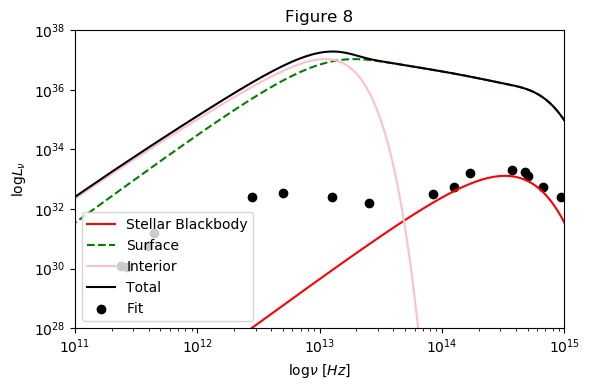

In [32]:
plt.figure(dpi=100)
plt.scatter(logv,(logLv),color='black',label='Fit')
plt.plot(freq,stellar_blackbody, color= 'red', label='Stellar Blackbody')


plt.plot(freq, surface_flared_disk2, color='green',linestyle='--',label='Surface')
plt.plot(freq,interior_flared_disk2, color='pink',linestyle='-',label='Interior')
plt.plot(freq,surface_flared_disk2+interior_flared_disk2+stellar_blackbody , color='black',linestyle='-',label='Total')


plt.xscale('log')
plt.yscale('log')


plt.title('Figure 8')
plt.xlabel(r'$\log \nu \ [Hz]$')
plt.ylabel(r'$\log L_{\nu} $')

plt.ylim(bottom=1e28, top=1e38)

plt.xlim(10**11,10**15)

plt.legend(loc='best')
plt.tight_layout()
plt.show()

If I scale the various disk quantities... divide the surface flared disk by 100,000 and the interior flared disk by 10,000, then I get:

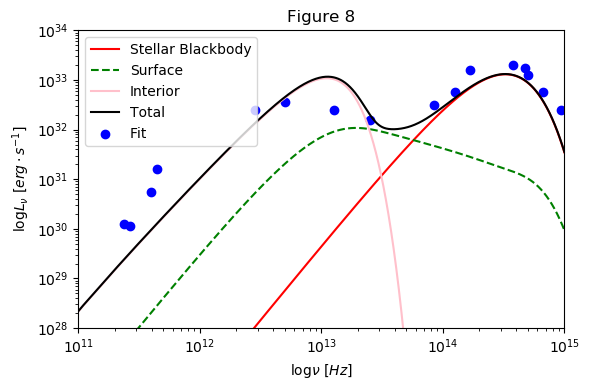

In [33]:
plt.figure(dpi=100)
plt.scatter(logv,(logLv),color='blue',label='Fit')
plt.plot(freq,stellar_blackbody, color= 'red', label='Stellar Blackbody')


plt.plot(freq, surface_flared_disk2/100000, color='green',linestyle='--',label='Surface')
plt.plot(freq,interior_flared_disk2/10000, color='pink',linestyle='-',label='Interior')
plt.plot(freq,surface_flared_disk2/100000+interior_flared_disk2/10000+stellar_blackbody , color='black',linestyle='-',label='Total')


plt.xscale('log')
plt.yscale('log')


plt.title('Figure 8')
plt.xlabel(r'$\log \nu \ [Hz]$')
plt.ylabel(r'$\log L_{\nu} \ [erg \cdot s^{-1}]  $')

plt.ylim(bottom=1e28, top=1e34)

plt.xlim(10**11,10**15)

plt.legend(loc='best')
plt.tight_layout()
plt.show()